<a href="https://colab.research.google.com/github/PhuocPhat19146046/Ktra_4_loai_banh/blob/main/dang_phuoc_phat_19146046.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.layers import Dense, Dropout, BatchNormalization, LSTM
from tensorflow.keras.optimizers import  SGD
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM, Flatten
import numpy as np
#from keras import kernel_initializer
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.15)
data_train=datagen.flow_from_directory('../input/data-4-loai-banh/4_loai_banh',
                                       target_size=(150,150),batch_size=5,
                                       class_mode='categorical',
                                       subset="training")
data_vali=datagen.flow_from_directory('../input/data-4-loai-banh/4_loai_banh',
                                      target_size=(150,150),batch_size=5,
                                      class_mode='categorical',
                                      subset="validation")

Found 574 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


In [ ]:
data_train.class_indices

{'Banh_da_lon': 0, 'Banh_hoi': 1, 'Banh_uot': 2, 'Banh_xeo': 3}

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='same',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3)) 

model.add(Conv2D(96,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(96,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3)) 

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3)) 

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))
opt=SGD(learning_rate=0.00002,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(data_train,epochs=35,batch_size=32,validation_data=data_vali,verbose=1)

Epoch 1/35
115/115 [==============================] - 12s 99ms/step - loss: 0.9342 - accuracy: 0.8188 - val_loss: 0.6524 - val_accuracy: 0.8800
Epoch 2/35
115/115 [==============================] - 12s 101ms/step - loss: 0.5687 - accuracy: 0.8676 - val_loss: 0.5324 - val_accuracy: 0.8800
Epoch 3/35
115/115 [==============================] - 11s 97ms/step - loss: 0.5346 - accuracy: 0.8659 - val_loss: 0.6830 - val_accuracy: 0.8900
Epoch 4/35
115/115 [==============================] - 11s 97ms/step - loss: 0.4711 - accuracy: 0.8676 - val_loss: 0.5381 - val_accuracy: 0.9000
Epoch 5/35
115/115 [==============================] - 12s 103ms/step - loss: 0.4232 - accuracy: 0.8746 - val_loss: 0.4463 - val_accuracy: 0.9200
Epoch 6/35
115/115 [==============================] - 11s 99ms/step - loss: 0.3889 - accuracy: 0.8746 - val_loss: 0.4039 - val_accuracy: 0.9100
Epoch 7/35
115/115 [==============================] - 11s 97ms/step - loss: 0.3709 - accuracy: 0.8833 - val_loss: 0.4392 - val_accurac

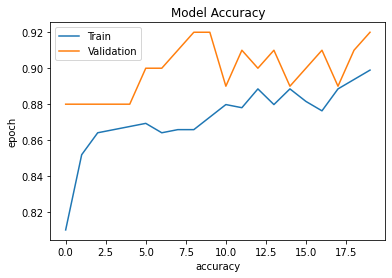

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
model.save('4_loai_banh_02.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_1=load_model('4_loai_banh_02.h5')

Found 8 images belonging to 1 classes.


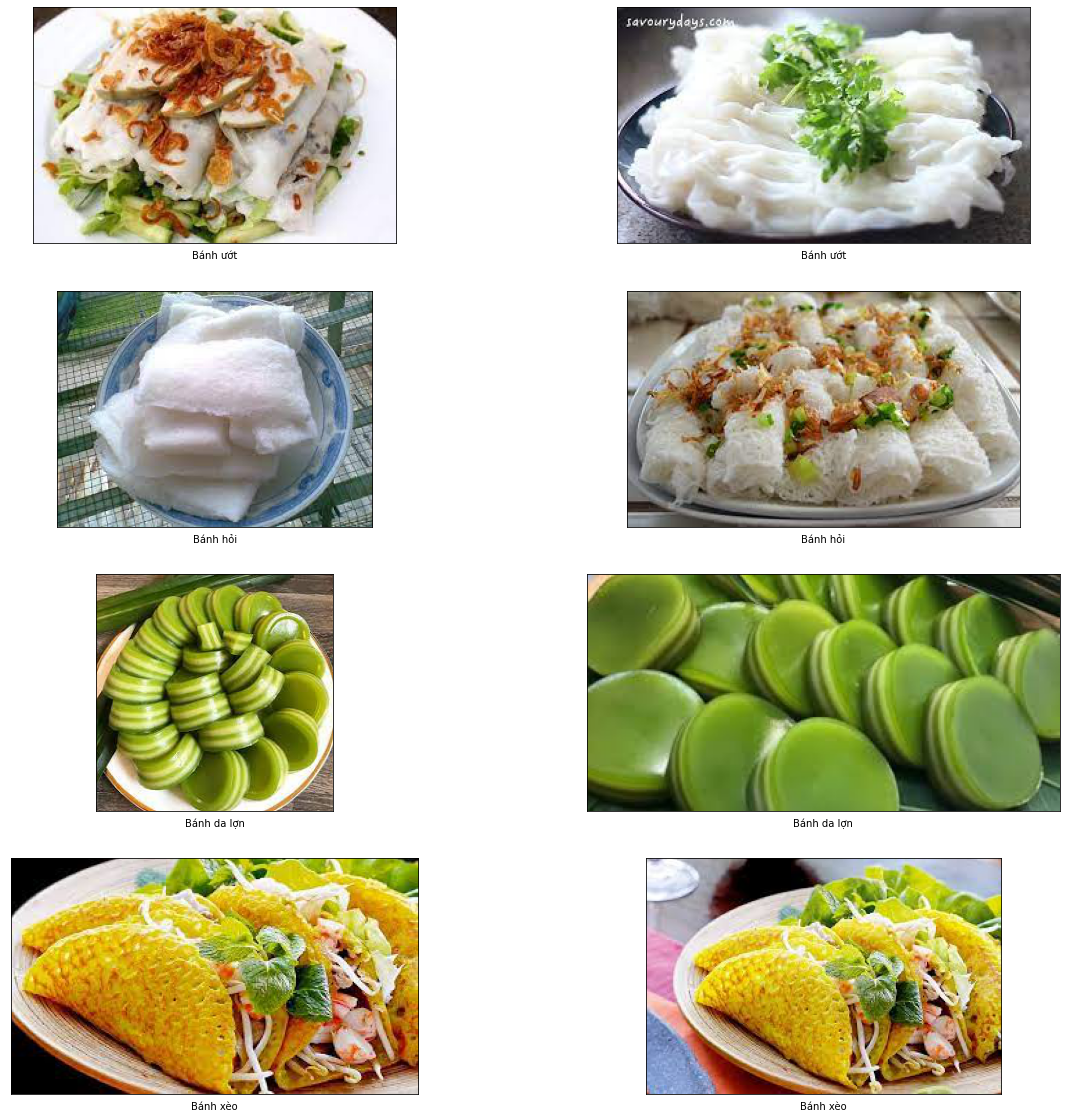

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import os
import matplotlib.pyplot as plt
from skimage import io
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
datagenerator=datagen.flow_from_directory('../input/banh-test',
                                          target_size=(128,128),batch_size=5,
                                          interpolation="lanczos",shuffle=False)
fruit={0:'Bánh da lợn',
      1:'Bánh hỏi',
      2:'Bánh ướt',
      3:'Bánh xèo'}
plt.figure(figsize=(20,20))
for i in range(len(datagenerator.filenames)):
    plt.subplot(4,2,i+1)
    plt.imshow(load_img(datagenerator.filepaths[i]))
    plt.xticks([])
    plt.yticks([])
    img=load_img('../input/banh-test/'+datagenerator.filenames[i],target_size=(150,150))
    img=img_to_array(img)
    img=img.reshape(1,150,150,3)
    img=img.astype('float')
    img/=255
    plt.xlabel(fruit[np.argmax(model_1.predict(img))])
plt.show()